In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
accuracies=[]

In [3]:
data=pd.read_csv("TRAIN.csv")

In [4]:
data.head()

,Unnamed: 0,blue,green,red,nir,slope,aspect,ndvi,ndwi,lai,...,savi,mndwi,twi,wri,awei,geomorphology,lineament,fa,fd,landslide
0,0,0.02990,0.04280,0.04585,0.17930,23.379407,184.960739,0.592716,-0.614588,1,...,0.143080,-0.670516,-6.524590,0.259679,-1.094512,350,0,-7.952559,0,0
1,1,0.03185,0.04740,0.04570,0.19155,23.379407,184.960739,0.614752,-0.603264,1,...,0.153530,-0.641452,-5.307001,0.259679,-1.094512,350,0,37.924812,0,0
2,2,0.03235,0.04550,0.04405,0.19060,23.379407,184.960739,0.624547,-0.614570,1,...,0.154872,-0.653333,-3.809007,0.250697,-1.113475,350,0,94.391121,0,0
3,3,0.03245,0.04765,0.04605,0.19140,23.379407,184.960739,0.612129,-0.601339,1,...,0.152958,-0.639902,-2.799061,0.231079,-1.105437,350,0,132.191116,0,0
4,4,0.03490,0.04975,0.04610,0.21030,23.379407,184.960739,0.640406,-0.617381,1,...,0.168010,-0.626992,-2.506445,0.235151,-1.096725,350,0,141.213913,0,0


In [5]:
data.corr()

,Unnamed: 0,blue,green,red,nir,slope,aspect,ndvi,ndwi,lai,...,savi,mndwi,twi,wri,awei,geomorphology,lineament,fa,fd,landslide
Unnamed: 0,1.000000,-0.128026,-0.113368,-0.097059,0.025547,2.676617e-01,7.806962e-02,0.059157,-0.062236,-0.263493,...,0.062598,-0.111668,0.141465,0.120633,0.124694,0.020236,-6.500932e-03,0.025311,0.103854,0.007093
blue,-0.128026,1.000000,0.968102,0.893422,0.123100,-6.792084e-02,1.147312e-01,-0.597294,0.546507,0.174597,...,-0.358997,0.947504,-0.009235,0.065829,0.094121,0.118756,-3.604602e-03,0.012359,-0.016558,-0.003594
green,-0.113368,0.968102,1.000000,0.906458,0.291272,-2.915983e-02,1.266193e-01,-0.493946,0.444685,0.113737,...,-0.205684,0.990455,-0.020428,0.049593,0.083575,0.105284,-3.330339e-03,0.003516,0.003100,0.003926
red,-0.097059,0.893422,0.906458,1.000000,0.226041,-5.507524e-02,5.413807e-02,-0.454545,0.322395,0.022293,...,-0.256467,0.880258,-0.031680,0.022456,0.058730,0.102448,-2.284212e-03,-0.012238,0.013571,-0.001284
nir,0.025547,0.123100,0.291272,0.226041,1.000000,3.502371e-01,2.493701e-01,0.601438,-0.617754,-0.091754,...,0.860026,0.313448,-0.002001,0.026143,0.035060,0.064399,-3.139453e-03,-0.014711,0.015061,0.037872
slope,0.267662,-0.067921,-0.029160,-0.055075,0.350237,1.000000e+00,2.277326e-01,0.335159,-0.331522,-0.012694,...,0.375827,-0.020763,0.086852,0.111211,0.093024,0.083402,-7.613684e-17,0.034238,-0.001529,0.034824
aspect,0.078070,0.114731,0.126619,0.054138,0.249370,2.277326e-01,1.000000e+00,0.127057,-0.108552,0.099184,...,0.202089,0.139659,0.027949,0.032411,0.046803,0.210259,-3.920643e-17,0.000632,0.029147,0.076443
ndvi,0.059157,-0.597294,-0.493946,-0.454545,0.601438,3.351591e-01,1.270572e-01,1.000000,-0.975223,-0.179870,...,0.903122,-0.491266,0.010473,-0.007814,-0.020380,-0.028550,5.039339e-04,-0.024555,0.018271,0.028988
ndwi,-0.062236,0.546507,0.444685,0.322395,-0.617754,-3.315220e-01,-1.085517e-01,-0.975223,1.000000,0.218778,...,-0.874116,0.447278,-0.003044,0.016708,0.025058,0.017561,-6.456840e-04,0.031681,-0.023598,-0.028808
lai,-0.263493,0.174597,0.113737,0.022293,-0.091754,-1.269375e-02,9.918351e-02,-0.179870,0.218778,1.000000,...,-0.144320,0.097821,0.029285,0.116946,0.078506,0.291135,1.577601e-03,0.071064,-0.228245,-0.070472


<AxesSubplot:>

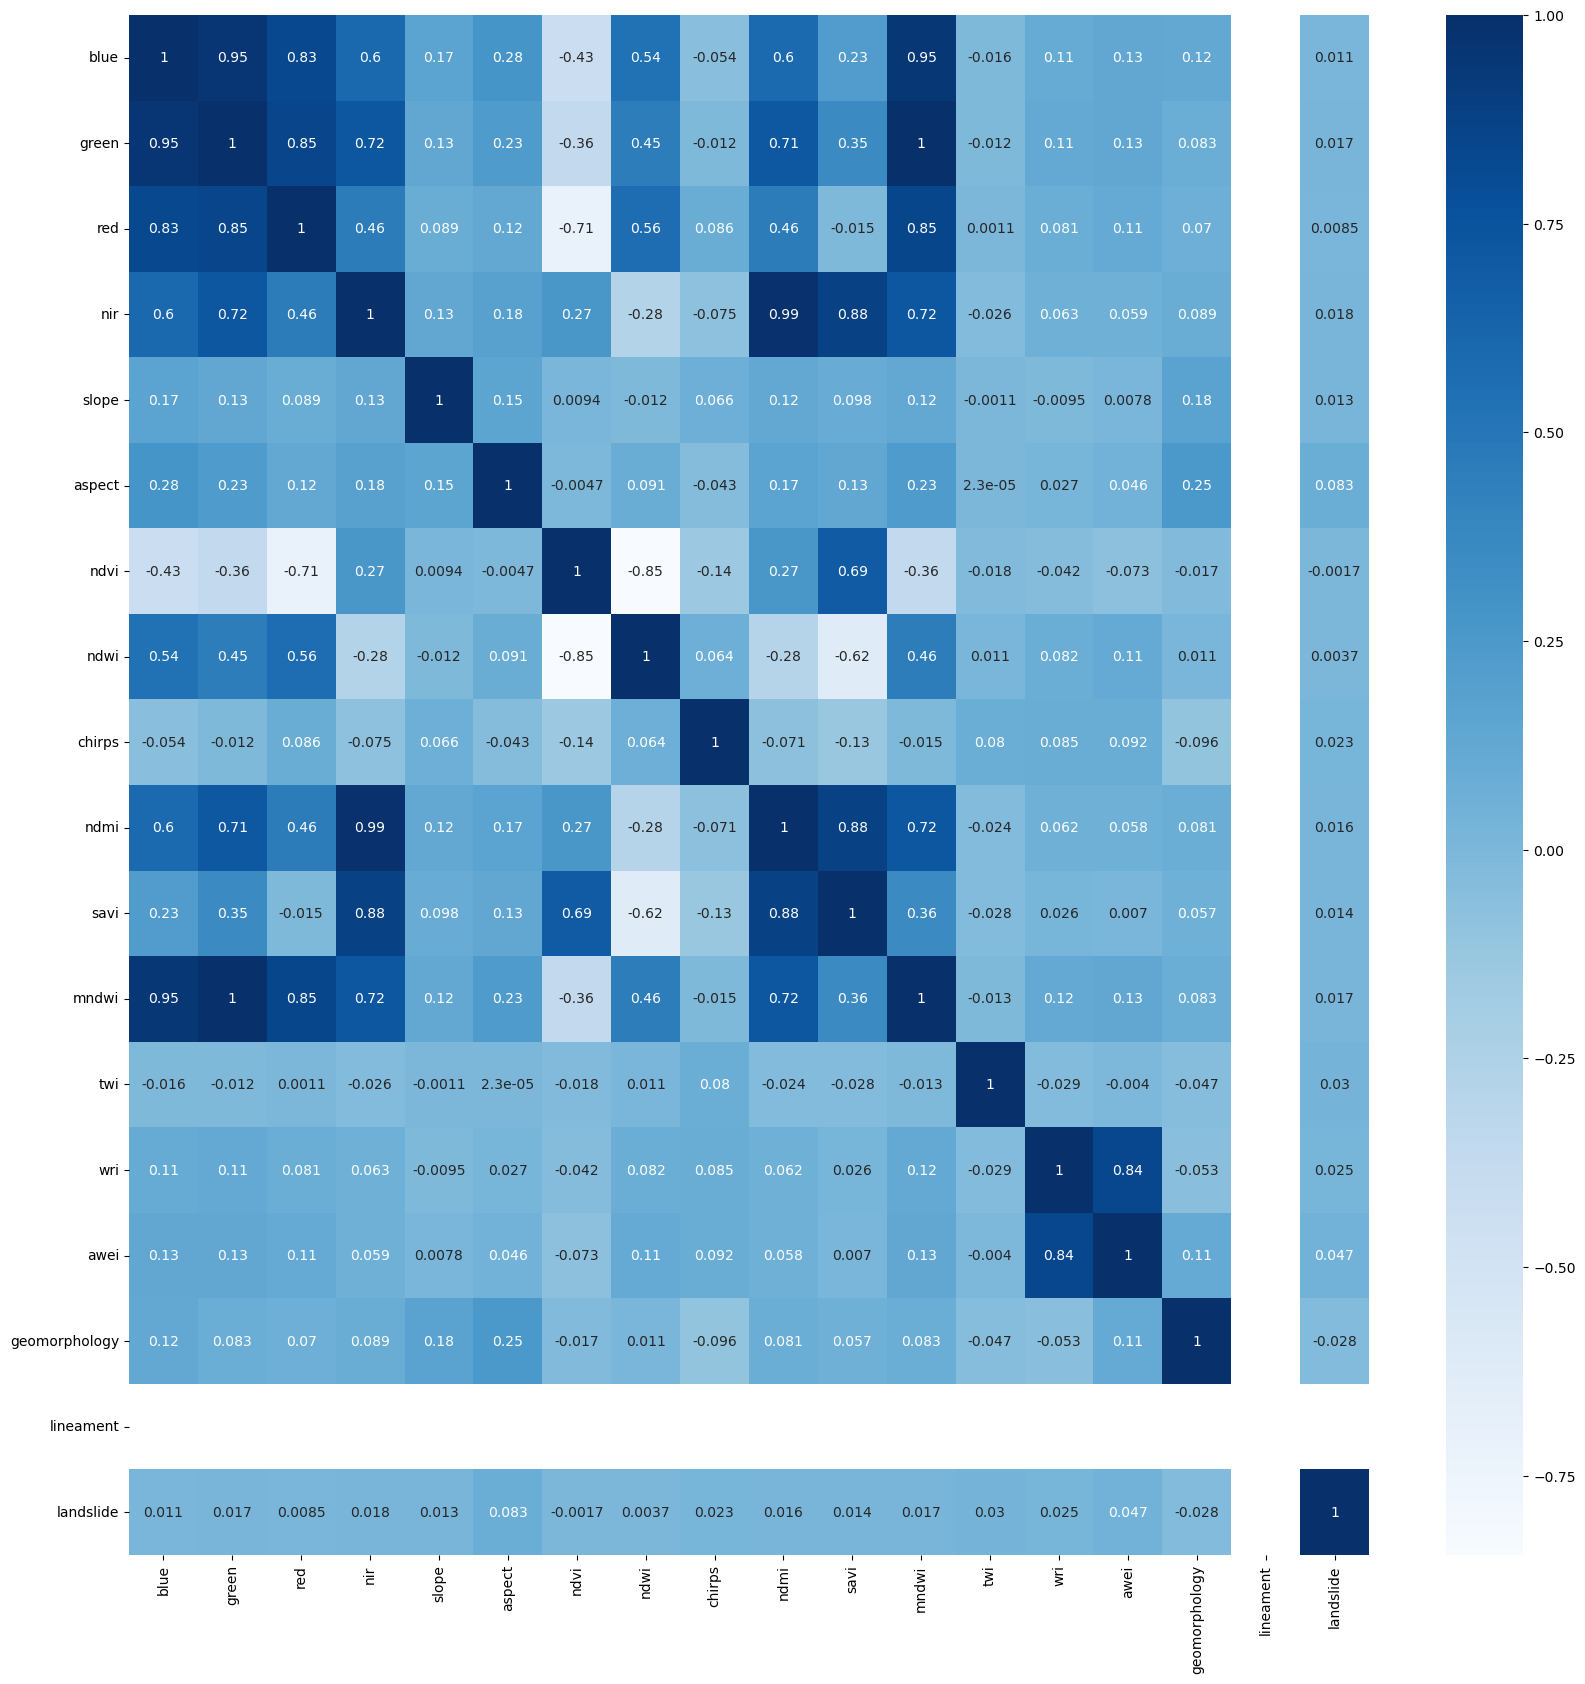

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244992 entries, 0 to 244991
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     244992 non-null  int64  
 1   blue           244992 non-null  float64
 2   green          244992 non-null  float64
 3   red            244992 non-null  float64
 4   nir            244992 non-null  float64
 5   slope          244992 non-null  float64
 6   aspect         244992 non-null  float64
 7   ndvi           244992 non-null  float64
 8   ndwi           244992 non-null  float64
 9   lai            244992 non-null  int64  
 10  chirps         244992 non-null  float64
 11  ndmi           244992 non-null  float64
 12  ndci           244992 non-null  float64
 13  savi           244992 non-null  float64
 14  mndwi          244992 non-null  float64
 15  twi            244992 non-null  float64
 16  wri            244992 non-null  float64
 17  awei           244992 non-nul

In [10]:
data.drop(['Unnamed: 0','lai','ndci','fa','fd'],axis=1,inplace=True)

In [11]:
data.head(2)

,blue,green,red,nir,slope,aspect,ndvi,ndwi,chirps,ndmi,savi,mndwi,twi,wri,awei,geomorphology,lineament,landslide
0,0.02990,0.0428,0.04585,0.17930,23.379407,184.960739,0.592716,-0.614588,9.216001,-0.095130,0.14308,-0.670516,-6.524590,0.259679,-1.094512,350,0,0
1,0.03185,0.0474,0.04570,0.19155,23.379407,184.960739,0.614752,-0.603264,9.216224,-0.062293,0.15353,-0.641452,-5.307001,0.259679,-1.094512,350,0,0


In [12]:
data['landslide'].value_counts()

0    235032
1      9960
Name: landslide, dtype: int64

<AxesSubplot:ylabel='landslide'>

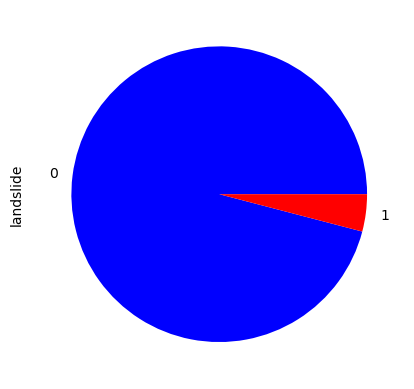

In [13]:
(data['landslide'].value_counts()).plot.pie(colors=['blue','red'])

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
under_sampler=RandomUnderSampler()

In [16]:
x,y=under_sampler.fit_resample(data.drop('landslide',axis=1),data['landslide'])

In [17]:
y.value_counts()

0    9960
1    9960
Name: landslide, dtype: int64

In [18]:
x

,blue,green,red,nir,slope,aspect,ndvi,ndwi,chirps,ndmi,savi,mndwi,twi,wri,awei,geomorphology,lineament
0,0.07330,0.09650,0.07030,0.32750,37.939045,330.706604,0.646556,-0.544811,9.376139,0.202938,0.218106,-0.384370,-5.094673,0.219145,-1.123000,358,0
1,0.03645,0.05490,0.04005,0.26435,10.312490,36.804173,0.736859,-0.656069,9.354655,0.098369,0.214463,-0.596175,-6.952431,0.260800,-1.106987,354,0
2,0.05190,0.07800,0.05545,0.33245,26.239605,264.345947,0.714102,-0.619929,9.308429,0.210119,0.237747,-0.471186,-6.883492,0.332060,-1.081837,351,0
3,0.03650,0.04620,0.03660,0.13370,21.035219,97.254662,0.570170,-0.486381,9.339642,-0.237525,0.113651,-0.648936,-6.362009,0.232145,-1.054137,399,0
4,0.03870,0.05865,0.04855,0.25665,9.679992,253.458740,0.681848,-0.627973,9.322713,0.083712,0.198757,-0.574460,-3.461670,0.207218,-1.142737,352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19915,0.05540,0.08825,0.06030,0.34760,23.379407,184.960739,0.704339,-0.595044,9.465757,0.231314,0.240687,-0.421785,-6.029397,0.440177,-0.966637,352,0
19916,0.05900,0.08830,0.06910,0.36130,23.379407,184.960739,0.678903,-0.607206,9.466014,0.249524,0.238376,-0.421553,-6.569770,0.302219,-1.052750,353,0
19917,0.06090,0.08675,0.07885,0.29820,23.379407,184.960739,0.581753,-0.549292,9.466271,0.157609,0.190804,-0.428807,-6.684044,0.273548,-1.073650,355,0
19918,0.05525,0.08360,0.07565,0.31130,23.379407,184.960739,0.608993,-0.576602,9.466529,0.178497,0.202492,-0.443779,-5.803711,0.379429,-1.011662,356,0


<AxesSubplot:>

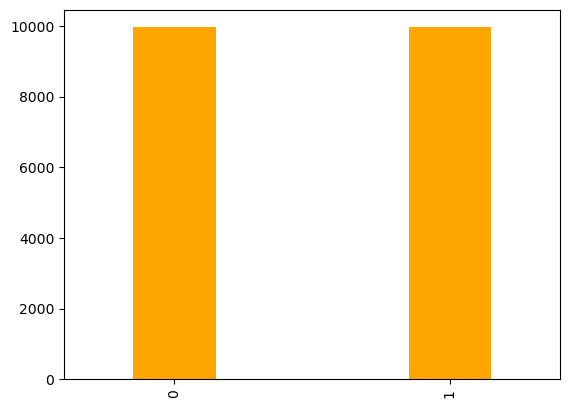

In [19]:
y.value_counts().plot.bar(width=0.3,color='orange')

In [20]:
data

,blue,green,red,nir,slope,aspect,ndvi,ndwi,chirps,ndmi,savi,mndwi,twi,wri,awei,geomorphology,lineament,landslide
0,0.02990,0.04280,0.04585,0.17930,23.379407,184.960739,0.592716,-0.614588,9.216001,-0.095130,0.143080,-0.670516,-6.524590,0.259679,-1.094512,350,0,0
1,0.03185,0.04740,0.04570,0.19155,23.379407,184.960739,0.614752,-0.603264,9.216224,-0.062293,0.153530,-0.641452,-5.307001,0.259679,-1.094512,350,0,0
2,0.03235,0.04550,0.04405,0.19060,23.379407,184.960739,0.624547,-0.614570,9.216447,-0.064769,0.154872,-0.653333,-3.809007,0.250697,-1.113475,350,0,0
3,0.03245,0.04765,0.04605,0.19140,23.379407,184.960739,0.612129,-0.601339,9.216671,-0.062684,0.152958,-0.639902,-2.799061,0.231079,-1.105437,350,0,0
4,0.03490,0.04975,0.04610,0.21030,23.379407,184.960739,0.640406,-0.617381,9.216894,-0.015680,0.168010,-0.626992,-2.506445,0.235151,-1.096725,350,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244987,0.05020,0.06370,0.04350,0.24155,23.379407,184.960739,0.694790,-0.582637,9.539281,0.053538,0.194503,-0.546135,-6.321147,0.210332,-1.125912,354,0,0
244988,0.05020,0.06465,0.04580,0.25240,23.379407,184.960739,0.692824,-0.592178,9.539547,0.075415,0.199226,-0.540920,-6.852121,0.210332,-1.125912,354,0,0
244989,0.05145,0.06755,0.04480,0.21965,23.379407,184.960739,0.661184,-0.529596,9.539813,0.006069,0.176827,-0.525215,-7.258355,0.201171,-1.141025,354,0,0
244990,0.05135,0.07115,0.04815,0.23250,23.379407,184.960739,0.656868,-0.531368,9.540079,0.034483,0.182173,-0.506160,-7.553056,0.195700,-1.142825,354,0,0


<AxesSubplot:xlabel='blue'>

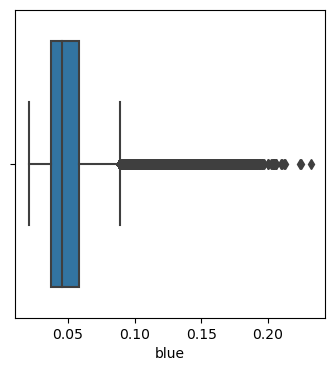

In [21]:
plt.figure(figsize=(4,4))
sns.boxplot(data['blue'])

Text(0.5, 0, 'outliers in green')

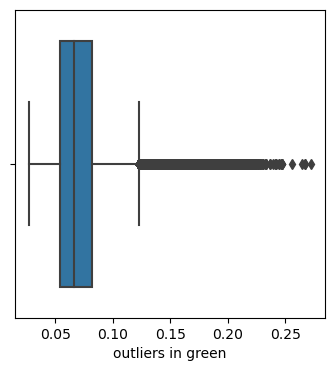

In [22]:
plt.figure(figsize=(4,4))
sns.boxplot(data['green'])
plt.xlabel("outliers in green")

Text(0.5, 0, 'outliers in red')

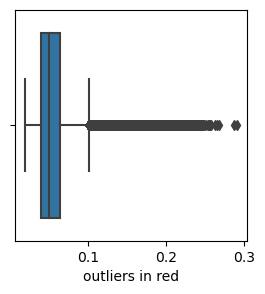

In [23]:
plt.figure(figsize=(3,3))
sns.boxplot(data['red'])
plt.xlabel("outliers in red")

Text(0.5, 0, 'outliers in nir')

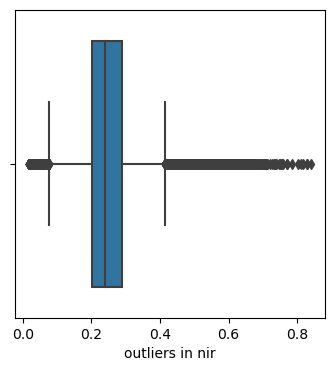

In [24]:
plt.figure(figsize=(4,4))
sns.boxplot(data['nir'])
plt.xlabel("outliers in nir")

Text(0.5, 0, 'outliers in slope')

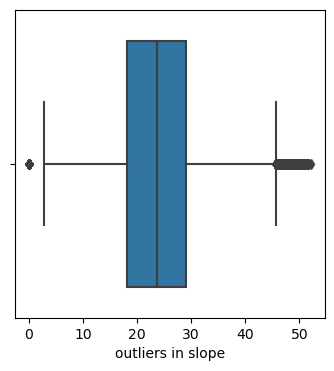

In [25]:
plt.figure(figsize=(4,4))
sns.boxplot(data['slope'])
plt.xlabel('outliers in slope')

<AxesSubplot:xlabel='aspect'>

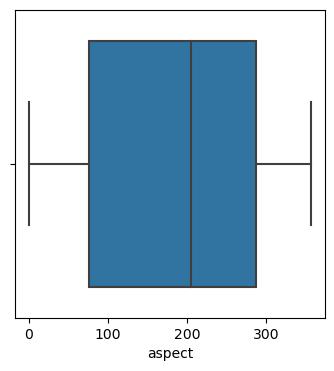

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data['aspect'])

Text(0.5, 0, 'ndvi')

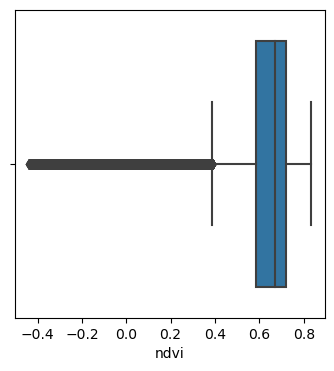

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndvi'])
plt.xlabel('ndvi')

Text(0.5, 0, 'ndwi')

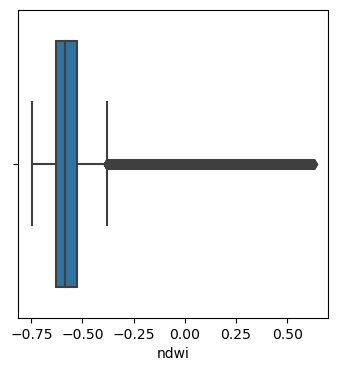

In [28]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndwi'])
plt.xlabel("ndwi")

<AxesSubplot:xlabel='chirps'>

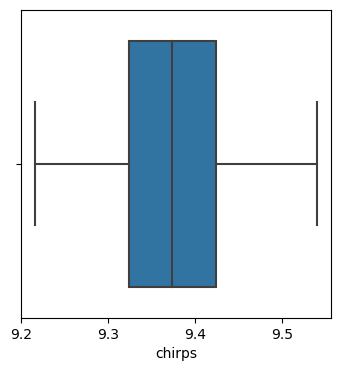

In [29]:
plt.figure(figsize=(4,4))
sns.boxplot(data['chirps'])

<AxesSubplot:xlabel='ndmi'>

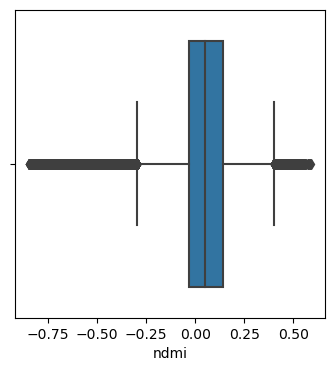

In [30]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndmi'])

<AxesSubplot:xlabel='twi'>

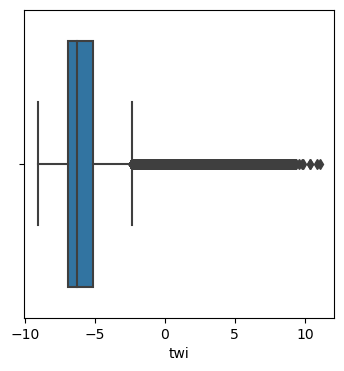

In [31]:
plt.figure(figsize=(4,4))
sns.boxplot(data['twi'])

<AxesSubplot:xlabel='wri'>

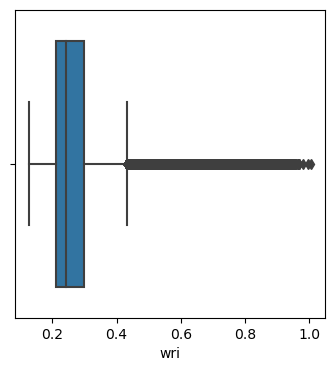

In [32]:
plt.figure(figsize=(4,4))
sns.boxplot(data['wri'])

<AxesSubplot:xlabel='awei'>

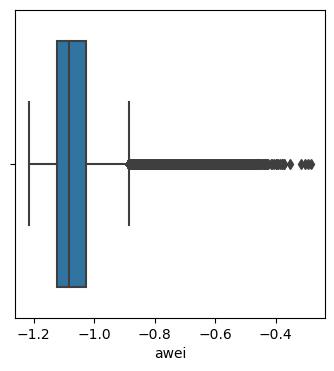

In [33]:
plt.figure(figsize=(4,4))
sns.boxplot(data['awei'])

<AxesSubplot:xlabel='geomorphology'>

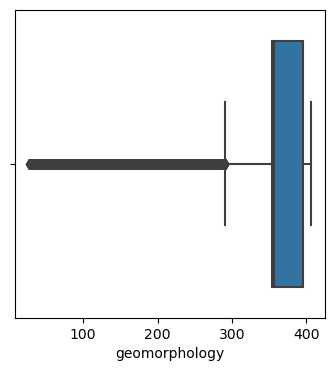

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(data['geomorphology'])

In [35]:
def remove_outliers(data_name,feature):
    Q1=np.percentile(feature , 25 , interpolation= 'midpoint')
    Q2=np.percentile(feature , 50 , interpolation= 'midpoint')
    Q3=np.percentile(feature , 75 , interpolation= 'midpoint')
    IQR=Q3-Q1
    lower_range=Q1 - 1.5*IQR
    upper_range=Q3 + 1.5*IQR
    data_name.drop(data_name.loc[feature<lower_range].index,inplace=True)
    data_name.drop(data_name.loc[feature>upper_range].index,inplace=True)

In [36]:
remove_outliers(data,data['red'])
remove_outliers(data,data['blue'])
remove_outliers(data,data['green'])
remove_outliers(data,data['slope'])
remove_outliers(data,data['aspect'])
remove_outliers(data,data['ndvi'])
remove_outliers(data,data['ndwi'])
remove_outliers(data,data['chirps'])
remove_outliers(data,data['ndmi'])
remove_outliers(data,data['twi'])
remove_outliers(data,data['wri'])
remove_outliers(data,data['geomorphology'])
remove_outliers(data,data['lineament'])
remove_outliers(data,data['awei'])
remove_outliers(data,data['nir'])

<AxesSubplot:xlabel='blue'>

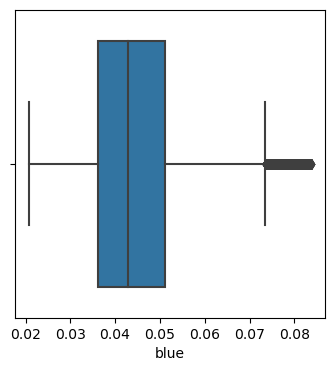

In [37]:
plt.figure(figsize=(4,4))
sns.boxplot(data['blue'])

<AxesSubplot:xlabel='green'>

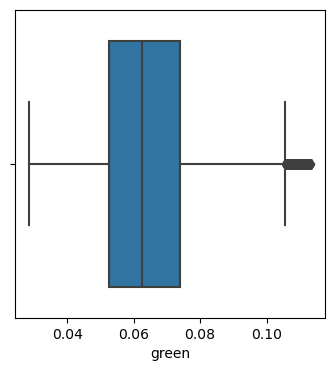

In [38]:
plt.figure(figsize=(4,4))
sns.boxplot(data['green'])

<AxesSubplot:xlabel='red'>

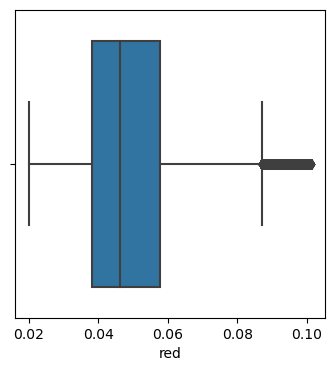

In [39]:
plt.figure(figsize=(4,4))
sns.boxplot(data['red'])

<AxesSubplot:xlabel='nir'>

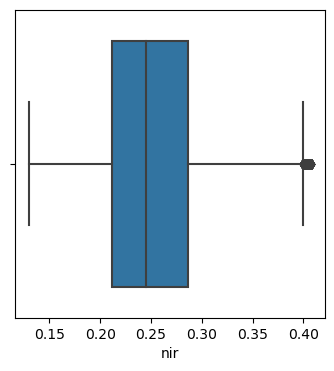

In [40]:
plt.figure(figsize=(4,4))
sns.boxplot(data['nir'])

<AxesSubplot:xlabel='slope'>

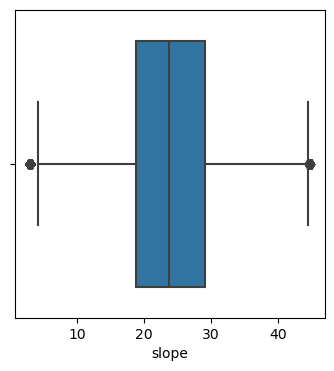

In [41]:
plt.figure(figsize=(4,4))
sns.boxplot(data['slope'])

<AxesSubplot:xlabel='aspect'>

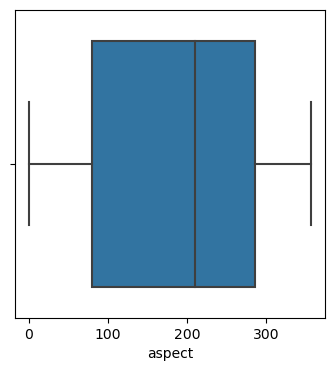

In [42]:
plt.figure(figsize=(4,4))
sns.boxplot(data['aspect'])

<AxesSubplot:xlabel='ndvi'>

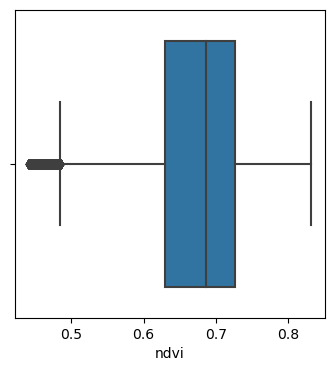

In [43]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndvi'])

<AxesSubplot:xlabel='ndwi'>

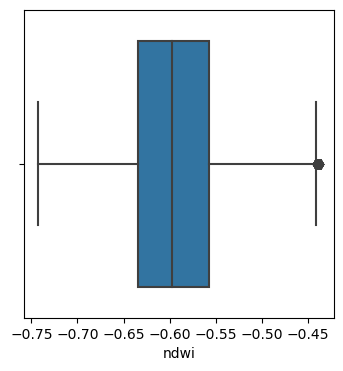

In [44]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndwi'])

<AxesSubplot:xlabel='chirps'>

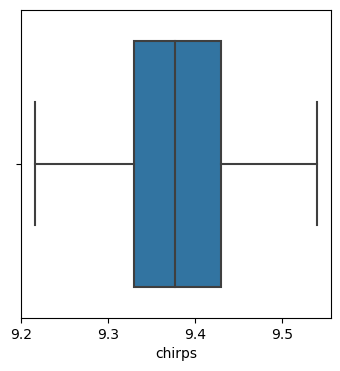

In [45]:
plt.figure(figsize=(4,4))
sns.boxplot(data['chirps'])

<AxesSubplot:xlabel='ndmi'>

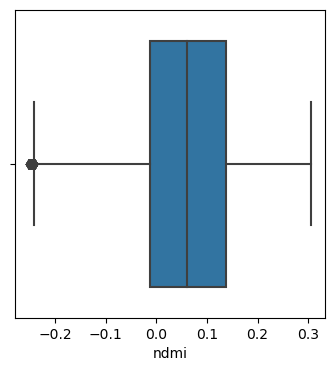

In [46]:
plt.figure(figsize=(4,4))
sns.boxplot(data['ndmi'])

<AxesSubplot:xlabel='twi'>

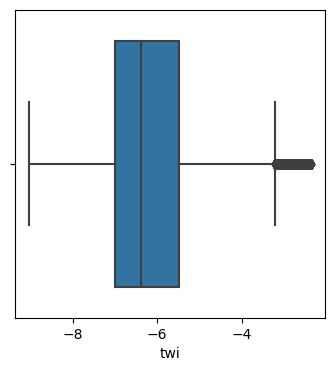

In [47]:
plt.figure(figsize=(4,4))
sns.boxplot(data['twi'])

<AxesSubplot:xlabel='wri'>

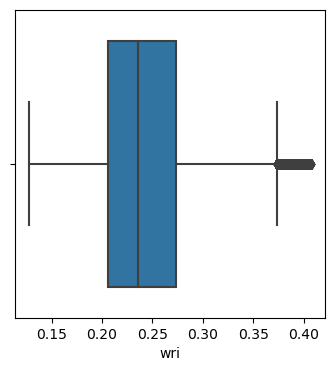

In [48]:
plt.figure(figsize=(4,4))
sns.boxplot(data['wri'])

<AxesSubplot:xlabel='awei'>

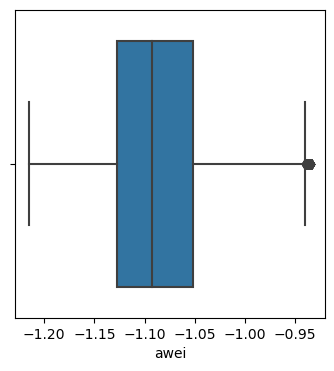

In [49]:
plt.figure(figsize=(4,4))
sns.boxplot(data['awei'])

<AxesSubplot:xlabel='geomorphology'>

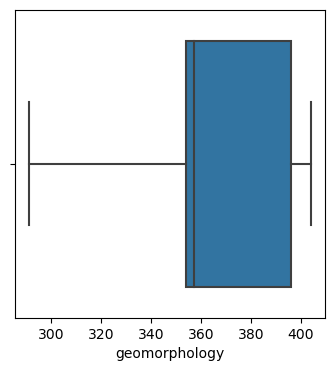

In [50]:
plt.figure(figsize=(4,4))
sns.boxplot(data['geomorphology'])

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

logistic_model.fit(x_train,y_train)

logistic_model.score(x_train,y_train)

logistic_model.score(x_test,y_test)

pred=logistic_model.predict(x_test)

accuracies.append(accuracy_score(y_test,pred))

print('train accuracy  ',logistic_model.score(x_test,y_test))
print('test accuracy : ',accuracy_score(y_test,pred))
print('confusion matrix : \n',confusion_matrix(y_test,pred))
print('\t\t**classification_report** \n',classification_report(y_test,pred))

train accuracy   0.6531124497991968
test accuracy :  0.6531124497991968
confusion matrix : 
 [[1170  855]
 [ 527 1432]]
		**classification_report** 
               precision    recall  f1-score   support

           0       0.69      0.58      0.63      2025
           1       0.63      0.73      0.67      1959

    accuracy                           0.65      3984
   macro avg       0.66      0.65      0.65      3984
weighted avg       0.66      0.65      0.65      3984



In [55]:
from sklearn.naive_bayes import GaussianNB
model_naive=GaussianNB()

model_naive.fit(x_train,y_train)

model_naive.score(x_test,y_test)

pred=model_naive.predict(x_test)

accuracies.append(accuracy_score(y_test,pred))

print('train accuracy  ',model_naive.score(x_test,y_test))
print('test accuracy : ',accuracy_score(y_test,pred))
print('confusion matrix : \n',confusion_matrix(y_test,pred))
print('\t\t**classification_report** \n',classification_report(y_test,pred))

train accuracy   0.615210843373494
test accuracy :  0.615210843373494
confusion matrix : 
 [[ 821 1204]
 [ 329 1630]]
		**classification_report** 
               precision    recall  f1-score   support

           0       0.71      0.41      0.52      2025
           1       0.58      0.83      0.68      1959

    accuracy                           0.62      3984
   macro avg       0.64      0.62      0.60      3984
weighted avg       0.65      0.62      0.60      3984



In [56]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=1)


model_knn.fit(x_train,y_train)

pred=model_knn.predict(x_test)

accuracies.append(accuracy_score(y_test,pred))

print('train accuracy  ',model_knn.score(x_test,y_test))
print('test accuracy : ',accuracy_score(y_test,pred))
print('confusion matrix : \n',confusion_matrix(y_test,pred))
print('\t\t**classification_report** \n',classification_report(y_test,pred))

train accuracy   0.8908132530120482
test accuracy :  0.8908132530120482
confusion matrix : 
 [[1691  334]
 [ 101 1858]]
		**classification_report** 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      2025
           1       0.85      0.95      0.90      1959

    accuracy                           0.89      3984
   macro avg       0.90      0.89      0.89      3984
weighted avg       0.90      0.89      0.89      3984



In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(max_depth= 9, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)

clf_rfc.fit(x_train, y_train)

y_pred =clf_rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

accuracies.append(accuracy_score(y_test,pred))

print("train accuracy",clf_rfc.score(x_train,y_train))
print("Accuracy: ", accuracy)
print('\t\t**classification_report** \n',classification_report(y_test,y_pred))

train accuracy 0.9014809236947792
Accuracy:  0.873995983935743
		**classification_report** 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      2025
           1       0.83      0.94      0.88      1959

    accuracy                           0.87      3984
   macro avg       0.88      0.88      0.87      3984
weighted avg       0.88      0.87      0.87      3984



In [58]:
from sklearn.tree import DecisionTreeClassifier

clf_dc = DecisionTreeClassifier(max_depth= 9, min_samples_leaf= 1, min_samples_split= 10)

clf_dc.fit(x_train, y_train)

y_pred = clf_dc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

accuracies.append(accuracy_score(y_test,pred))

print("train accuracy",clf_dc.score(x_train,y_train))
print("Accuracy: ", accuracy)
print('\t\t**classification_report** \n',classification_report(y_test,y_pred))

train accuracy 0.8778865461847389
Accuracy:  0.8448795180722891
		**classification_report** 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      2025
           1       0.81      0.89      0.85      1959

    accuracy                           0.84      3984
   macro avg       0.85      0.85      0.84      3984
weighted avg       0.85      0.84      0.84      3984



In [59]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf',gamma='scale',C=10)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

accuracies.append(accuracy_score(y_test,pred))

print("train accuracy",clf.score(x_train,y_train))
print("Accuracy: ", accuracy)
print('\t\t**classification_report** \n',classification_report(y_test,y_pred))

train accuracy 0.8852284136546185
Accuracy:  0.8699799196787149
		**classification_report** 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      2025
           1       0.83      0.93      0.88      1959

    accuracy                           0.87      3984
   macro avg       0.88      0.87      0.87      3984
weighted avg       0.88      0.87      0.87      3984



In [63]:
import pickle
pickle.dump(model_knn,open('knn.pkl','wb'))
pickle.dump(logistic_model,open('logistic.pkl','wb'))
pickle.dump(model_naive,open('naive.pkl','wb'))
pickle.dump(clf,open('svc.pkl','wb'))
pickle.dump(clf_rfc,open('random_forest.pkl','wb'))
pickle.dump(clf_dc,open('Decision_tree.pkl','wb'))

In [64]:
import easygui
import pickle
import numpy as np
def get_measurements():
    measurements = []
    msg = "Enter the measurement values:"
    title = "Measurement Input"
    field_names = ['blue','green' ,'red' ,'nir ','slope ','aspect','ndvi ','ndwi ','chirps ','ndmi' ,'savi ','mndwi' ,'twi ','wri' ,'awei','geomorphology','lineament']
    field_values = [""] * 17
    field_values = easygui.multenterbox(msg, title, field_names, field_values)

    while True:
        if field_values is None:  # User clicked cancel
            return None

        errors = validate_measurements(field_values)
        if not errors:
            break
        else:
            easygui.msgbox('\n'.join(errors), 'Invalid Measurements')
            field_values = easygui.multenterbox(msg, title, field_names, field_values)

    measurements = [float(value) for value in field_values]
    return measurements

def validate_measurements(values):
    errors = []
    for value in values:
        if not value.strip():  # Empty value
            errors.append("Please enter a value for all measurements.")
        else:
            try:
                float(value)
            except ValueError:
                errors.append("Invalid measurement value: " + value + ". Please enter a number.")

    return errors

# Usage
measurements = get_measurements()
if measurements is not None:
    print("Measurements:", measurements)
else:
    print("Measurement input was canceled.")
pickle_lr=pickle.load(open('knn.pkl','rb'))
pickle_naive=pickle.load(open('logistic.pkl','rb'))
pickle_knn=pickle.load(open('naive.pkl','rb'))
pickle_svc=pickle.load(open('svc.pkl','rb'))
pickle_dtc=pickle.load(open('decision_tree.pkl','rb'))
pickle_rfc=pickle.load(open('random_forest.pkl','rb'))
    
measurements=np.array(measurements)
measurements=measurements.reshape(1,-1)

pickle_lr=pickle.load(open('knn.pkl','rb'))
pickle_naive=pickle.load(open('logistic.pkl','rb'))
pickle_knn=pickle.load(open('naive.pkl','rb'))
pickle_svc=pickle.load(open('svc.pkl','rb'))
pickle_dtc=pickle.load(open('decision_tree.pkl','rb'))
pickle_rfc=pickle.load(open('random_forest.pkl','rb'))


a=pickle_lr.predict(measurements)
b=pickle_naive.predict(measurements)
c=pickle_knn.predict(measurements)
d=pickle_dtc.predict(measurements)
e=pickle_rfc.predict(measurements)
f=pickle_svc.predict(measurements)

count=int(a+b+c+d+e+f)
counter_count=int(6-count)

def value_encode(x):
    if x==0:
        x='not occurre'
        return x
    else :
        x='occurre'
        return x

a=value_encode(a)
b=value_encode(b)
c=value_encode(c)
d=value_encode(d)
e=value_encode(e)
f=value_encode(f)
        
text = f"KNN algorithm predicts - landslide will {c}\n\nrandom forest algorithm predicts - landslide will {e}\n\nSVM algorithm predicts - landslide will {f}\n\ndecision tree algorithm predicts - landslide will {d}\n\nLogistic Regression algorithm predicts - landslide will {a}\n\nNaive Bayes algorithm predicts - landslide will {b}\n\n\n\n\nno of algorithm predicted that landslide will occure\t=\t{count}\nno of algrithm predicted that landslide will not occure\t=\t{counter_count}"

# Display the text in a dialog box
easygui.msgbox(text, title="outputs",ok_button="OK")


# End of the program



Measurements: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


'OK'